# FRP Mass Univariate ANOVA pairwise permutation test

## Import libraries

In [1]:
import numpy as np
from tqdm.notebook import tqdm
from utils.utils import *
from mne.stats import *
import mne

import scipy
mne.set_log_level('CRITICAL')

In [2]:
# erp parameter combinations
required_parameters = [ERP_PARAMETER_EPOCH_INTERVAL,
                       ERP_PARAMETER_CORRECT_TRIALS_ONLY, ERP_PARAMETER_PARTICIPANTS, ERP_PARAMETER_ERP_FRP]
with open(get_erp_parameters_path(False), 'r') as f:
    all_frp_parameter_combinations = json.load(f)
all_frp_parameter_combinations

[{'epoch_interval': [-0.3, 1.0],
  'erp_frp': 'first_fixation_aoi_small',
  'snippet_group': 'CalcDiff',
  'snippet_numbers': [0, 10, 11, 12, 13, 14, 15, 30, 5, 54, 7, 8, 9],
  'participants': ['003',
   '004',
   '005',
   '007',
   '008',
   '009',
   '010',
   '011',
   '012',
   '013',
   '014',
   '015',
   '016',
   '017',
   '018',
   '019',
   '020',
   '021',
   '022',
   '023',
   '024',
   '101',
   '102',
   '106'],
  'conditional_stimuli': {'clean': 'Stimulus/S191',
   'confusing': 'Stimulus/S192'},
  'plot': False,
  'correct_data_only': False,
  'topomap_times': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.98]},
 {'epoch_interval': [-0.3, 1.0],
  'erp_frp': 'combined_approach_small',
  'snippet_group': 'CalcDiff',
  'snippet_numbers': [0, 10, 11, 12, 13, 14, 15, 30, 5, 54, 7, 8, 9],
  'participants': ['003',
   '004',
   '005',
   '007',
   '008',
   '009',
   '010',
   '011',
   '012',
   '013',
   '014',
   '015',
   '016',
   '017',
   '018',
   '019',
   '020',
   '021',
   '022

  0%|          | 0/1 [00:00<?, ?it/s]

{'epoch_interval': [-0.3, 1.0], 'erp_frp': 'first_fixation_aoi_small', 'snippet_group': 'all', 'participants': ['003', '004', '005', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '101', '102', '106'], 'conditional_stimuli': {'clean': 'Stimulus/S191', 'confusing': 'Stimulus/S192'}, 'plot': False, 'correct_data_only': False, 'topomap_times': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.98]}
faois_-300_1000_all


  0%|          | 0/1 [00:00<?, ?it/s]

multiple channels
	subjects x times (x electrodes) (24, 90, 23)
	Test greater
		Permutation count 1000.0
Using a threshold of 1.713872
stat_fun(H1): min=-2.483113 max=5.004061
Running initial clustering …
Found 18 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

			 P values [0.196 0.912 0.738 0.587 0.7   0.88  0.421 0.793 0.899 0.732 0.045 0.636
 0.873 0.9   0.205 0.908 0.106 0.796]
			 positive clusters [10]
	Test less
		Permutation count 1000.0
Using a threshold of -1.713872
stat_fun(H1): min=-2.483113 max=5.004061
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

			 P values [0.724 0.876]
			 positive clusters []
(368, 900, 4)


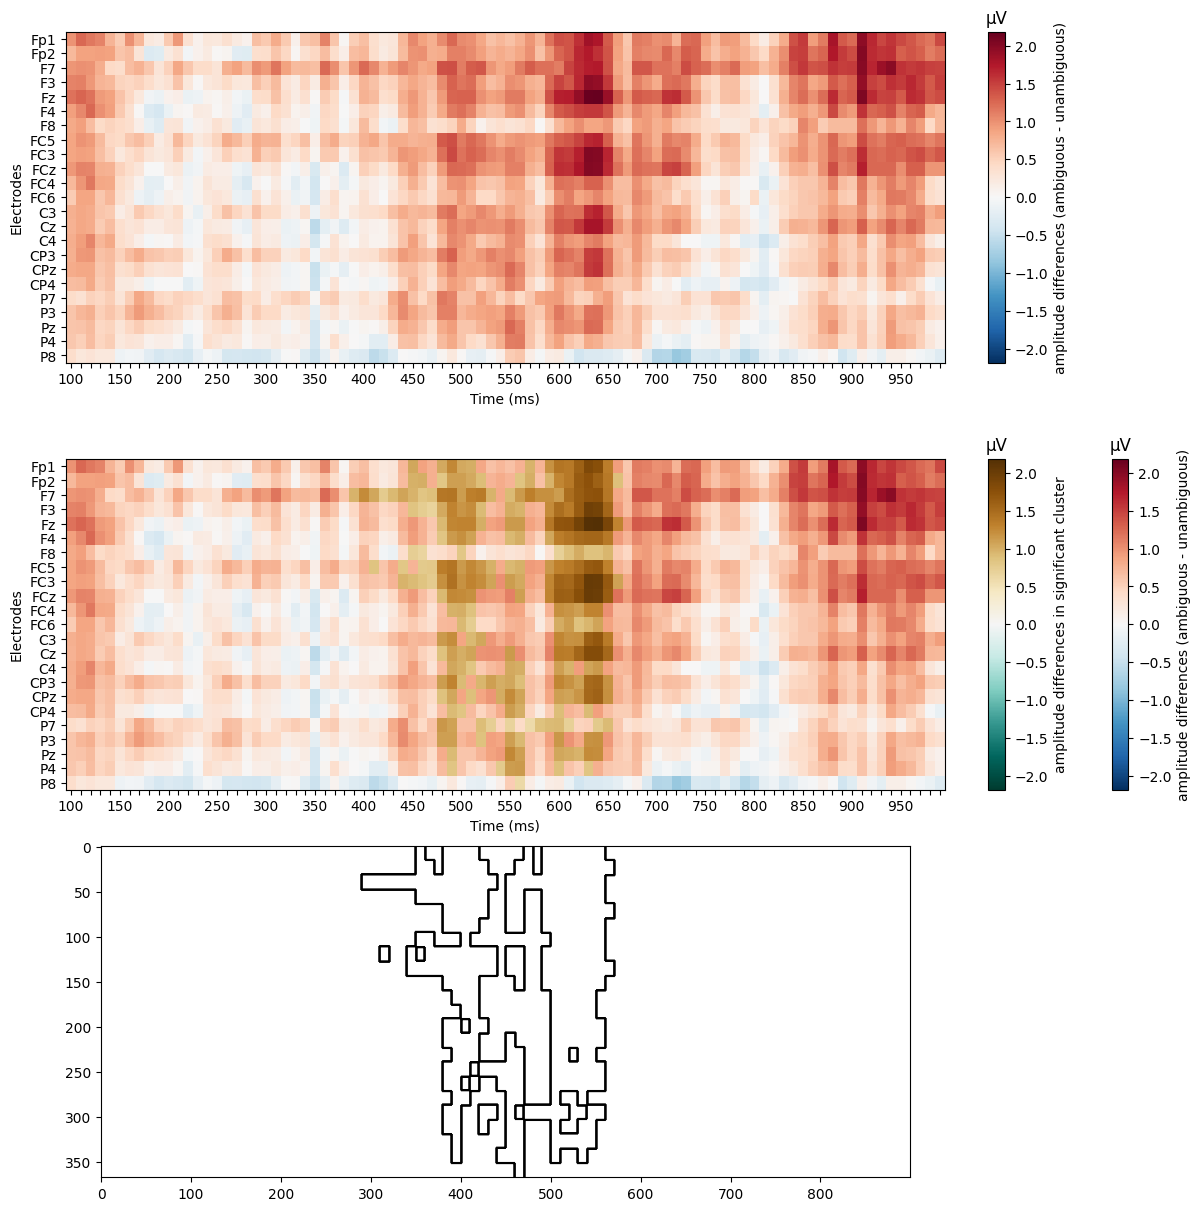

In [3]:
# prepare data
for frp_parameters in tqdm(all_frp_parameter_combinations[13:14]):
    print(frp_parameters)
    frp_parameters[ERP_PARAMETER_CORRECT_TRIALS_ONLY]=False
    perform_cluster_permutation_test_diff(frp_parameters[ERP_PARAMETER_ERP_FRP], frp_parameters[ERP_PARAMETER_SNIPPET_GROUP] if ERP_PARAMETER_SNIPPET_GROUP in frp_parameters else SNIPPET_GROUP_ALL, frp_parameters[ERP_PARAMETER_CORRECT_TRIALS_ONLY],
                                          frp_parameters[ERP_PARAMETER_EPOCH_INTERVAL], frp_parameters[ERP_PARAMETER_PARTICIPANTS], 
                                          subinterval=[0.1, 1.0], downsample_to=100, ignore_channels=ERP_PERM_CHANNELS_TO_IGNORE, each_channel=False)